In [ ]:
import pandas as pd
import numpy as np
import os


In [ ]:
!pip install librosa

In [ ]:
import librosa

In [ ]:
base_dir=r"/content/drive/MyDrive/TESS Toronto emotional speech set data"

In [ ]:
def extract_fft_features(file_path, fixed_length):
    y, sr = librosa.load(file_path, sr=None)
    fft_result = np.fft.fft(y)
    magnitude_spectrum = np.abs(fft_result)
    # Use the first half of the FFT result
    features = magnitude_spectrum[:len(magnitude_spectrum) // 2]
    # Pad or trim the features to the fixed length
    if len(features) < fixed_length:
        features = np.pad(features, (0, fixed_length - len(features)), 'constant')
    else:
        features = features[:fixed_length]
    return features

In [ ]:
data = []

In [ ]:
# Fixed length for FFT features
fixed_length = 1000

In [ ]:
for class_dir in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_dir)
    if os.path.isdir(class_path):
        # Loop through each audio file in the class directory
        for file_name in os.listdir(class_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(class_path, file_name)
                features = extract_fft_features(file_path, fixed_length)
                # Combine the file name, class, and features into one row
                row = [file_name, class_dir] + features.tolist()
                data.append(row)

In [ ]:
columns = ['file_name', 'class'] + [f'fft_{i}' for i in range(fixed_length)]
df = pd.DataFrame(data, columns=columns)

In [ ]:
df.to_csv('audio_fft_features.csv', index=False)

In [ ]:
df=pd.read_csv('audio_fft_features.csv')

In [ ]:
df.head()

,file_name,class,fft_0,fft_1,fft_2,fft_3,fft_4,fft_5,fft_6,fft_7,...,fft_990,fft_991,fft_992,fft_993,fft_994,fft_995,fft_996,fft_997,fft_998,fft_999
0,OAF_bone_neutral.wav,neutral,0.678284,0.868584,4.204409,3.519414,12.734366,12.783788,12.034661,17.189386,...,0.229235,0.501679,0.362728,0.440439,0.486017,0.273568,0.456743,0.142623,0.623139,0.260040
1,OAF_cab_neutral.wav,neutral,0.995575,1.547579,2.291896,8.094669,8.582493,13.306904,27.016625,31.039884,...,0.513660,0.041963,0.653816,0.918425,1.195685,0.743834,0.347799,0.744330,1.408103,1.390403
2,OAF_burn_neutral.wav,neutral,1.603699,2.794527,6.935659,2.575547,5.723130,12.139798,18.626158,18.166583,...,4.199815,3.887916,4.052369,3.649007,3.106534,3.389729,2.340651,3.457726,3.220975,2.057703
3,OAF_back_neutral.wav,neutral,1.123108,0.768683,2.041808,3.309860,9.540181,12.717255,7.621601,16.568951,...,1.102851,0.626617,0.279537,0.933479,1.165472,1.430121,1.144022,1.153814,0.323516,0.697930
4,OAF_calm_neutral.wav,neutral,2.991150,3.446368,3.462696,3.628997,8.624616,21.362487,23.112578,7.861204,...,0.896511,3.570638,4.998622,1.869090,4.126411,7.257709,3.231238,4.070044,9.723223,4.027806


In [ ]:
df['class'].unique()

array(['neutral', 'disgust', 'Sad', 'Pleasant_surprise', 'angry', 'Fear',
       'happy'], dtype=object)

In [ ]:
df.drop(columns=['file_name'], inplace=True)

In [ ]:
df.head()

,class,fft_0,fft_1,fft_2,fft_3,fft_4,fft_5,fft_6,fft_7,fft_8,...,fft_990,fft_991,fft_992,fft_993,fft_994,fft_995,fft_996,fft_997,fft_998,fft_999
0,neutral,0.678284,0.868584,4.204409,3.519414,12.734366,12.783788,12.034661,17.189386,9.604088,...,0.229235,0.501679,0.362728,0.440439,0.486017,0.273568,0.456743,0.142623,0.623139,0.260040
1,neutral,0.995575,1.547579,2.291896,8.094669,8.582493,13.306904,27.016625,31.039884,11.201365,...,0.513660,0.041963,0.653816,0.918425,1.195685,0.743834,0.347799,0.744330,1.408103,1.390403
2,neutral,1.603699,2.794527,6.935659,2.575547,5.723130,12.139798,18.626158,18.166583,14.980629,...,4.199815,3.887916,4.052369,3.649007,3.106534,3.389729,2.340651,3.457726,3.220975,2.057703
3,neutral,1.123108,0.768683,2.041808,3.309860,9.540181,12.717255,7.621601,16.568951,18.621911,...,1.102851,0.626617,0.279537,0.933479,1.165472,1.430121,1.144022,1.153814,0.323516,0.697930
4,neutral,2.991150,3.446368,3.462696,3.628997,8.624616,21.362487,23.112578,7.861204,9.297522,...,0.896511,3.570638,4.998622,1.869090,4.126411,7.257709,3.231238,4.070044,9.723223,4.027806


In [ ]:
df['class'] = df['class'].replace({'neutral':0, 'disgust':1,'Sad':2,'Pleasant_surprise':3, 'angry':4, 'Fear':5,
       'happy':6})


In [ ]:
df.head()

,class,fft_0,fft_1,fft_2,fft_3,fft_4,fft_5,fft_6,fft_7,fft_8,...,fft_990,fft_991,fft_992,fft_993,fft_994,fft_995,fft_996,fft_997,fft_998,fft_999
0,0,0.678284,0.868584,4.204409,3.519414,12.734366,12.783788,12.034661,17.189386,9.604088,...,0.229235,0.501679,0.362728,0.440439,0.486017,0.273568,0.456743,0.142623,0.623139,0.260040
1,0,0.995575,1.547579,2.291896,8.094669,8.582493,13.306904,27.016625,31.039884,11.201365,...,0.513660,0.041963,0.653816,0.918425,1.195685,0.743834,0.347799,0.744330,1.408103,1.390403
2,0,1.603699,2.794527,6.935659,2.575547,5.723130,12.139798,18.626158,18.166583,14.980629,...,4.199815,3.887916,4.052369,3.649007,3.106534,3.389729,2.340651,3.457726,3.220975,2.057703
3,0,1.123108,0.768683,2.041808,3.309860,9.540181,12.717255,7.621601,16.568951,18.621911,...,1.102851,0.626617,0.279537,0.933479,1.165472,1.430121,1.144022,1.153814,0.323516,0.697930
4,0,2.991150,3.446368,3.462696,3.628997,8.624616,21.362487,23.112578,7.861204,9.297522,...,0.896511,3.570638,4.998622,1.869090,4.126411,7.257709,3.231238,4.070044,9.723223,4.027806


In [ ]:
y = df['class'].values

In [ ]:
X = df.drop(columns=['class']).values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.2921 - loss: 1.7761 - val_accuracy: 0.6808 - val_loss: 1.1140
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7489 - loss: 0.9394 - val_accuracy: 0.7879 - val_loss: 0.6324
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8698 - loss: 0.4339 - val_accuracy: 0.8281 - val_loss: 0.5343
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9114 - loss: 0.2842 - val_accuracy: 0.8393 - val_loss: 0.4268
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9568 - loss: 0.1593 - val_accuracy: 0.8705 - val_loss: 0.4225
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9743 - loss: 0.1299 - val_accuracy: 0.8638 - val_loss: 0.4203
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9789 - loss: 0.0912 - val_accuracy: 0.8393 - val_loss: 0.4465
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9800 - loss: 0.0652 - val_accuracy: 0.8504 - v

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       0.88      0.69      0.77        89
           2       0.83      0.97      0.90        77
           3       0.81      0.86      0.84        86
           4       0.89      0.96      0.92        76
           5       0.89      0.88      0.88        83
           6       0.80      0.77      0.78        73

    accuracy                           0.87       560
   macro avg       0.87      0.88      0.87       560
weighted avg       0.87      0.87      0.87       560



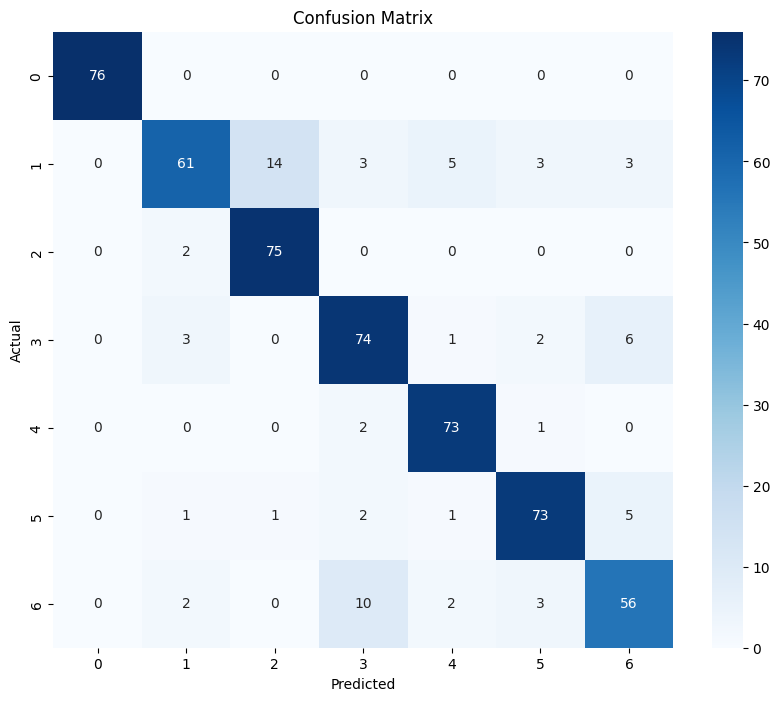

In [33]:
print("Classification Report:")
# Convert label_encoder.classes_ to a list of strings
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test, y_pred_classes, target_names=target_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names) # Use target_names here as well
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()